Question-20
# A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year.
Can you infer anything from the attendence record?

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday_name attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv(r"code/data/bikes.csv", parse_dates=["Date"], dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [32]:
df.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,2013-01-01,NaN,0,0,1,0,6,0,1,0
1,2013-01-02,NaN,69,0,13,0,18,0,2,0
2,2013-01-03,NaN,69,2,21,6,22,1,0,0
3,2013-01-04,NaN,80,0,22,4,16,0,125,0
4,2013-01-05,NaN,52,4,19,3,12,0,97,0


In [33]:
df.describe()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261,0.0,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2013-05-11 00:00:00,NaN,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
min,2013-01-01 00:00:00,NaN,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,2013-03-07 00:00:00,NaN,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2013-05-11 00:00:00,NaN,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,2013-07-15 00:00:00,NaN,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,2013-09-18 00:00:00,NaN,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000
std,NaN,NaN,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574


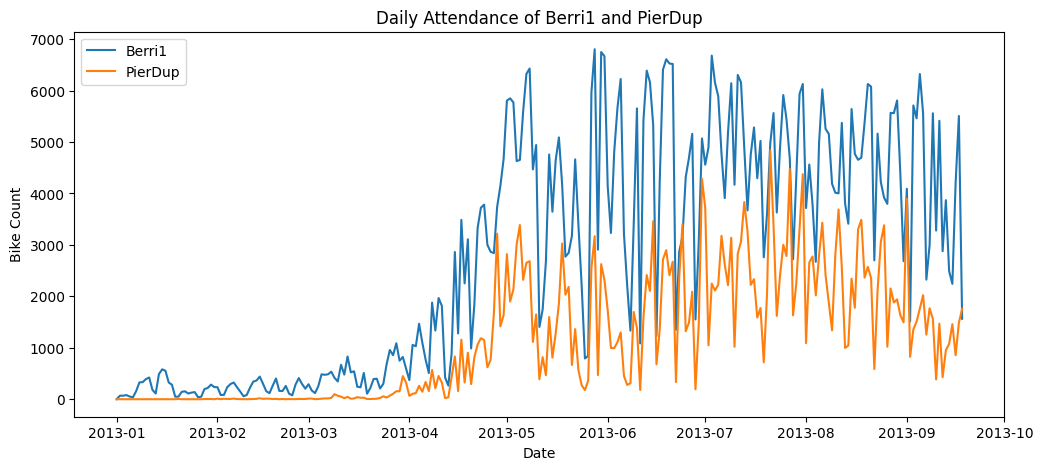

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Berri1"], label="Berri1")
plt.plot(df["Date"], df["PierDup"], label="PierDup")
plt.xlabel("Date")
plt.ylabel("Bike Count")
plt.legend()
plt.title("Daily Attendance of Berri1 and PierDup")
plt.show()

In [35]:
# Check index and weekday
df.set_index("Date", inplace=True)
df["Weekday"] = df.index.day_name()

# Get sum of all attendance as a function of the weekday
weekday_sum = df.groupby("Weekday").sum(numeric_only=True).sum(axis=1)

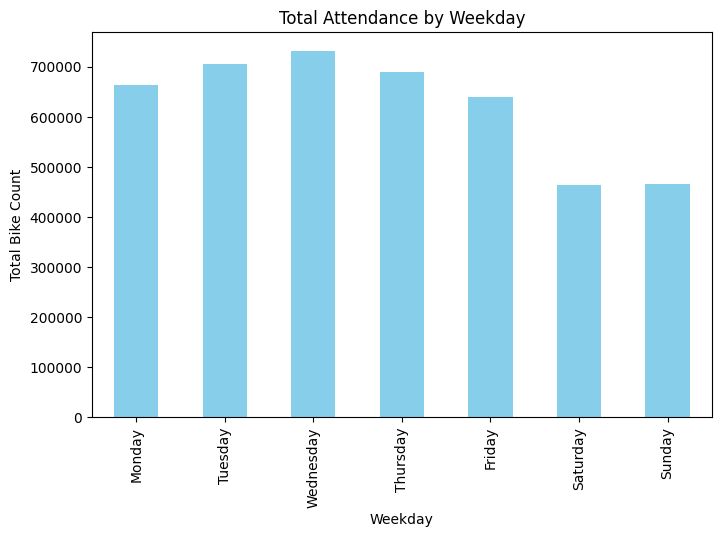

In [36]:
plt.figure(figsize=(8, 5))
weekday_sum.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar", color="skyblue")
plt.xlabel("Weekday")
plt.ylabel("Total Bike Count")
plt.title("Total Attendance by Weekday")
plt.show()